In [1]:
# 1.1 The COVID-19 dashboard from the World Health Organization:
# https://covid19.who.int/table

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


In [3]:
url = 'https://covid19.who.int/table'


In [4]:
page = requests.get(url)


In [5]:
soup = BeautifulSoup(page.content, 'html.parser')


In [6]:
soup.title.text


''

In [7]:
# 1. Extract the total number of confirmed cases and deaths globally or for a
# specific country using BeautifulSoup to parse the HTML and Pandas to
# manipulate the data.


In [8]:
table = soup.find('div', {'role': 'table'})


In [9]:
case_total = table.find_all('div', {'class': 'th'})


In [10]:
case_total_list = []
for value in case_total:
    case_total_list.append(value.text)


In [11]:
case_total_list


['Name',
 'Cases - cumulative totalPlatform/C/Chevron/Down CopyCreated with Sketch.',
 'Cases - newly reported in last 7 days',
 'Deaths - cumulative total',
 'Deaths - newly reported in last 7 days',
 'Total vaccine doses administered per 100 population',
 'Persons fully vaccinated with last dose of primary series per 100 population',
 'Persons Boosted per 100 population',
 'Global',
 '758,390,564',
 '983,089',
 '6,859,093',
 '6,414',
 '169.72',
 '65.1',
 '30.8']

In [12]:
heading_list = case_total_list[1:8]


In [13]:
heading_list


['Cases - cumulative totalPlatform/C/Chevron/Down CopyCreated with Sketch.',
 'Cases - newly reported in last 7 days',
 'Deaths - cumulative total',
 'Deaths - newly reported in last 7 days',
 'Total vaccine doses administered per 100 population',
 'Persons fully vaccinated with last dose of primary series per 100 population',
 'Persons Boosted per 100 population']

In [14]:
global_values = case_total_list[9:]


In [15]:
global_values


['758,390,564', '983,089', '6,859,093', '6,414', '169.72', '65.1', '30.8']

In [16]:
global_dict = {}


In [17]:
for i in range(len(global_values)):
    global_dict[heading_list[i]] = global_values[i]


In [18]:
global_dict


{'Cases - cumulative totalPlatform/C/Chevron/Down CopyCreated with Sketch.': '758,390,564',
 'Cases - newly reported in last 7 days': '983,089',
 'Deaths - cumulative total': '6,859,093',
 'Deaths - newly reported in last 7 days': '6,414',
 'Total vaccine doses administered per 100 population': '169.72',
 'Persons fully vaccinated with last dose of primary series per 100 population': '65.1',
 'Persons Boosted per 100 population': '30.8'}

In [19]:
print('The Global Figures:')
for k, v in global_dict.items():
    print(f'{k}: {v}')


The Global Figures:
Cases - cumulative totalPlatform/C/Chevron/Down CopyCreated with Sketch.: 758,390,564
Cases - newly reported in last 7 days: 983,089
Deaths - cumulative total: 6,859,093
Deaths - newly reported in last 7 days: 6,414
Total vaccine doses administered per 100 population: 169.72
Persons fully vaccinated with last dose of primary series per 100 population: 65.1
Persons Boosted per 100 population: 30.8


In [20]:
# 2. Scrape the daily new cases and deaths data for a particular country
# and store it in a Pandas DataFrame for analysis.


In [21]:
country_data = table.find_all('div', {'role': 'row'})


In [22]:
country_data_list = []


In [23]:
for value in country_data:
    country_data_list.append(value.text)


In [24]:
df_country_data_list = pd.DataFrame(country_data_list[3:])


In [25]:
df_country_data_list


,0
0,"United States of America102,019,564267,1681,10..."
1,"China99,030,12997,455119,865355235.5286.8254.7"
2,"India44,686,3711,239530,77110159.7968.9716.49"
3,"France38,513,43126,390161,253170234.378.9660.88"
4,"Germany38,144,033110,846167,95173232.276.4262.67"
5,"Brazil37,024,41734,560698,947891236.2979.7951.29"
6,"Japan33,190,29692,34472,320583301.9181.6968.05"
7,"Republic of Korea30,513,72167,94633,977104265...."
8,"Italy25,576,85216,179188,094130251.882.9675.28"
9,"The United Kingdom24,370,1549,356206,95239222...."


In [26]:
country = table.find_all('div', {'class': 'column_name'})


In [27]:
country_list = []

for value in country:
    country_list.append(value.text)


In [28]:
df_country_list = pd.DataFrame(country_list[2:])


In [29]:
df_country_list


,0
0,United States of America
1,China
2,India
3,France
4,Germany
5,Brazil
6,Japan
7,Republic of Korea
8,Italy
9,The United Kingdom


In [30]:
new_cases_7_days = table.find_all('div', {'class': 'column_Last_7_Days_Confirmed'})


In [31]:
new_cases_7_days_list = []
for value in new_cases_7_days:
    new_cases_7_days_list.append(value.text)

In [32]:
df_new_cases_7_days_list = pd.DataFrame(new_cases_7_days_list[2:])


In [33]:
df_new_cases_7_days_list


,0
0,"267,168"
1,"97,455"
2,"1,239"
3,"26,390"
4,"110,846"
5,"34,560"
6,"92,344"
7,"67,946"
8,"16,179"
9,"9,356"


In [34]:
new_deaths_7_days = table.find_all('div', {'class': 'column_Last_7_Days_Deaths'})


In [35]:
new_deaths_7_days_list = []
for value in new_deaths_7_days:
    new_deaths_7_days_list.append(value.text)


In [36]:
df_new_deaths_7_days_list = pd.DataFrame(new_deaths_7_days_list[2:])


In [37]:
df_new_deaths_7_days_list


,0
0,"2,362"
1,355
2,10
3,170
4,73
5,891
6,583
7,104
8,130
9,39


In [38]:
new_cases_data_list_per_country = {}
for i in range(len(df_new_cases_7_days_list)):
    new_cases_data_list_per_country[df_country_list._get_value(i, col=0)] = df_new_cases_7_days_list._get_value(i, col=0)


In [39]:
new_cases_data_list_per_country


{'United States of America': '267,168',
 'China': '97,455',
 'India': '1,239',
 'France': '26,390',
 'Germany': '110,846',
 'Brazil': '34,560',
 'Japan': '92,344',
 'Republic of Korea': '67,946',
 'Italy': '16,179',
 'The United Kingdom': '9,356',
 'Russian Federation': '82,482',
 'Türkiye': '',
 'Spain': '7,380',
 'Viet Nam': '80',
 'Australia': '',
 'Argentina': '817',
 'Netherlands': '3,420',
 'Iran (Islamic Republic of)': '899'}

In [40]:
new_death_cases_data_list_per_country = {}
for i in range(len(df_new_cases_7_days_list)):
    new_death_cases_data_list_per_country[df_country_list._get_value(i, col=0)] = df_new_deaths_7_days_list._get_value(i, col=0)


In [41]:
new_death_cases_data_list_per_country


{'United States of America': '2,362',
 'China': '355',
 'India': '10',
 'France': '170',
 'Germany': '73',
 'Brazil': '891',
 'Japan': '583',
 'Republic of Korea': '104',
 'Italy': '130',
 'The United Kingdom': '39',
 'Russian Federation': '233',
 'Türkiye': '',
 'Spain': '194',
 'Viet Nam': '',
 'Australia': '202',
 'Argentina': '5',
 'Netherlands': '',
 'Iran (Islamic Republic of)': '30'}

In [42]:
# 3. Compare the total cases and deaths across different countries
# using BeautifulSoup and Pandas and create visualizations to
# compare the data.

In [43]:
graph_new_cases = []
country_list = []
for k, v in new_cases_data_list_per_country.items():
    v1 = v.replace(',', '')
    v2 = pd.to_numeric(v1)
    graph_new_cases.append(float(v2))
    country_list.append(k)



In [44]:
graph_new_cases


[267168.0,
 97455.0,
 1239.0,
 26390.0,
 110846.0,
 34560.0,
 92344.0,
 67946.0,
 16179.0,
 9356.0,
 82482.0,
 nan,
 7380.0,
 80.0,
 nan,
 817.0,
 3420.0,
 899.0]

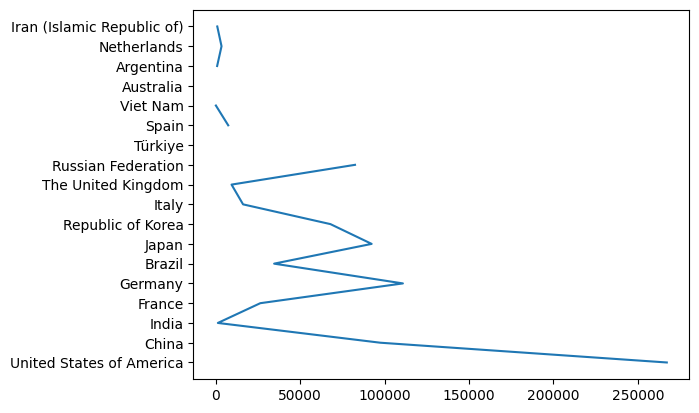

In [45]:
plt.plot(graph_new_cases, country_list)
plt.show()


In [46]:
graph_new_deaths = []
country_list = []
for k, v in new_death_cases_data_list_per_country.items():
    v1 = v.replace(',', '')
    v2 = pd.to_numeric(v1)
    graph_new_deaths.append(float(v2))
    country_list.append(k)


In [47]:
graph_new_deaths


[2362.0,
 355.0,
 10.0,
 170.0,
 73.0,
 891.0,
 583.0,
 104.0,
 130.0,
 39.0,
 233.0,
 nan,
 194.0,
 nan,
 202.0,
 5.0,
 nan,
 30.0]

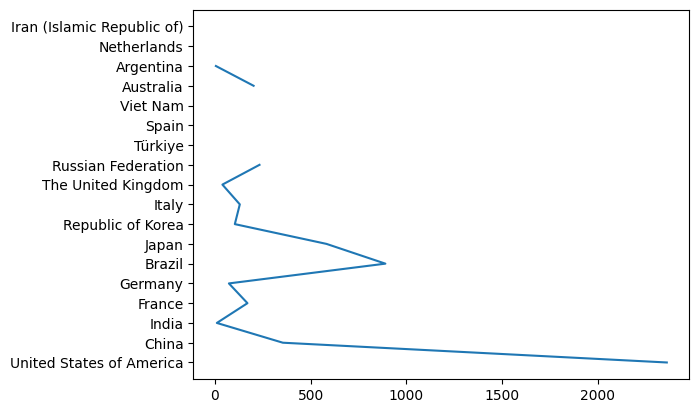

In [48]:
plt.plot(graph_new_deaths, country_list)
plt.show()


In [264]:
# 4. Extract the vaccination data for different countries and
# visualize the vaccination rates using Pandas and Matplotlib.


In [265]:
total_vaccine_doses = table.find_all('div', {'class': 'column_Total_Vaccinations_Per_100'})


In [266]:
total_fully_vaccinated = table.find_all('div', {'class': 'column_Total_Fully_Vacc_Per_100'})


In [267]:
total_boosted = table.find_all('div', {'class': 'column_Total_Boosted_Per_100'})


In [268]:
total_vaccine_doses_list = []
for value in total_vaccine_doses:
    v1 = pd.to_numeric(value.text)
    v2 = float(v1)
    total_vaccine_doses_list.append(v2)


In [269]:
total_vaccine_doses_list


[nan,
 nan,
 200.15,
 235.52,
 159.79,
 234.3,
 232.2,
 236.29,
 301.91,
 265.51,
 251.8,
 222.8,
 126.5,
 165.63,
 237.3,
 273.53,
 254.37,
 242.62,
 207.4,
 187.86]

In [270]:
total_fully_vaccinated_list = []
for value in total_fully_vaccinated:
    v1 = pd.to_numeric(value.text)
    v2 = float(v1)
    total_fully_vaccinated_list.append(v2)


In [271]:
total_fully_vaccinated_list


[nan,
 nan,
 68.62,
 86.82,
 68.97,
 78.96,
 76.42,
 79.79,
 81.69,
 86.7,
 82.96,
 74.59,
 54.22,
 60.94,
 79.17,
 88.28,
 84.91,
 83.72,
 68.69,
 69.7]

In [272]:
total_boosted_list = []
for value in total_boosted:
    v1 = pd.to_numeric(value.text)
    v2 = float(v1)
    total_boosted_list.append(v2)


In [273]:
total_boosted_list


[nan,
 nan,
 34.87,
 54.7,
 16.49,
 60.88,
 62.67,
 51.29,
 68.05,
 65.63,
 75.28,
 nan,
 nan,
 33.55,
 55.98,
 59.33,
 56.3,
 68.17,
 54.1,
 37.33]

In [274]:
df_vaccinated= pd.DataFrame()
df_vaccinated


""


In [275]:
df_vaccinated['country_list'] = country_list

In [276]:
df_vaccinated['total_vaccine_doses'] = total_vaccine_doses_list[2:]


In [277]:
df_vaccinated


,country_list,total_vaccine_doses
0,United States of America,200.15
1,China,235.52
2,India,159.79
3,France,234.30
4,Germany,232.20
5,Brazil,236.29
6,Japan,301.91
7,Republic of Korea,265.51
8,Italy,251.80
9,The United Kingdom,222.80


In [278]:
df_vaccinated['total_fully_vaccinated_list'] = total_fully_vaccinated_list[2:]


In [279]:
df_vaccinated


,country_list,total_vaccine_doses,total_fully_vaccinated_list
0,United States of America,200.15,68.62
1,China,235.52,86.82
2,India,159.79,68.97
3,France,234.30,78.96
4,Germany,232.20,76.42
5,Brazil,236.29,79.79
6,Japan,301.91,81.69
7,Republic of Korea,265.51,86.70
8,Italy,251.80,82.96
9,The United Kingdom,222.80,74.59


In [280]:
df_vaccinated['total_boosted'] = total_boosted_list[2:]


In [281]:
df_vaccinated


,country_list,total_vaccine_doses,total_fully_vaccinated_list,total_boosted
0,United States of America,200.15,68.62,34.87
1,China,235.52,86.82,54.70
2,India,159.79,68.97,16.49
3,France,234.30,78.96,60.88
4,Germany,232.20,76.42,62.67
5,Brazil,236.29,79.79,51.29
6,Japan,301.91,81.69,68.05
7,Republic of Korea,265.51,86.70,65.63
8,Italy,251.80,82.96,75.28
9,The United Kingdom,222.80,74.59,NaN


In [286]:
df = df_vaccinated.set_index('country_list')


In [287]:
df

,total_vaccine_doses,total_fully_vaccinated_list,total_boosted
country_list,,,
United States of America,200.15,68.62,34.87
China,235.52,86.82,54.70
India,159.79,68.97,16.49
France,234.30,78.96,60.88
Germany,232.20,76.42,62.67
Brazil,236.29,79.79,51.29
Japan,301.91,81.69,68.05
Republic of Korea,265.51,86.70,65.63
Italy,251.80,82.96,75.28


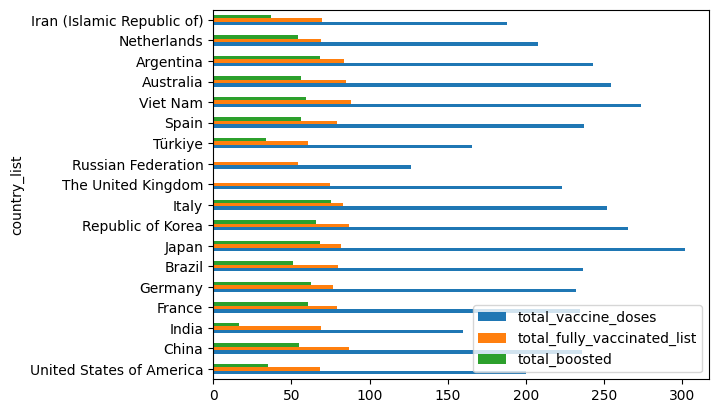

In [289]:
df.plot(kind='barh')
plt.show()
